In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
df=pd.read_csv('house.csv')

In [4]:
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [5]:
data = pd.read_csv("house.csv" ,delim_whitespace=True, names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
X = data.drop('MEDV',axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

In [8]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666.0,20.2,22.01,17.15
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384.0,20.9,395.24,12.27
261,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264.0,13.0,388.37,7.26
43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233.0,17.9,394.46,7.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88
271,0.16211,20.0,6.96,0,0.464,6.240,16.3,4.4290,3,223.0,18.6,396.90,6.59
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666.0,20.2,396.90,28.28
325,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,5,287.0,19.6,393.68,5.08


In [9]:
X_train.shape

(404, 13)

In [10]:
y_train.shape

(404,)

In [11]:
X_test.shape

(102, 13)

In [12]:
y_test.shape

(102,)

In [13]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [15]:
import xgboost as xgb

In [16]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [21]:
pip install --upgrade catboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
from catboost import CatBoostRegressor

In [25]:
model = CatBoostRegressor(loss_function='RMSE')
model.fit(X,y)

Learning rate set to 0.036765
0:	learn: 8.9985824	total: 148ms	remaining: 2m 27s
1:	learn: 8.8042315	total: 149ms	remaining: 1m 14s
2:	learn: 8.5941862	total: 150ms	remaining: 50s
3:	learn: 8.4176957	total: 152ms	remaining: 37.8s
4:	learn: 8.2604708	total: 153ms	remaining: 30.5s
5:	learn: 8.1151947	total: 155ms	remaining: 25.6s
6:	learn: 7.9483809	total: 156ms	remaining: 22.2s
7:	learn: 7.7888555	total: 157ms	remaining: 19.5s
8:	learn: 7.6364669	total: 159ms	remaining: 17.5s
9:	learn: 7.4720103	total: 161ms	remaining: 15.9s
10:	learn: 7.3077275	total: 162ms	remaining: 14.6s
11:	learn: 7.1638149	total: 164ms	remaining: 13.5s
12:	learn: 7.0211266	total: 165ms	remaining: 12.5s
13:	learn: 6.8763643	total: 167ms	remaining: 11.8s
14:	learn: 6.7567806	total: 169ms	remaining: 11.1s
15:	learn: 6.6149514	total: 171ms	remaining: 10.5s
16:	learn: 6.4856242	total: 172ms	remaining: 9.96s
17:	learn: 6.3663360	total: 174ms	remaining: 9.51s
18:	learn: 6.2504182	total: 176ms	remaining: 9.1s
19:	learn: 6

In [26]:
explainer=shap.Explainer(model)
shap_values=explainer(X)

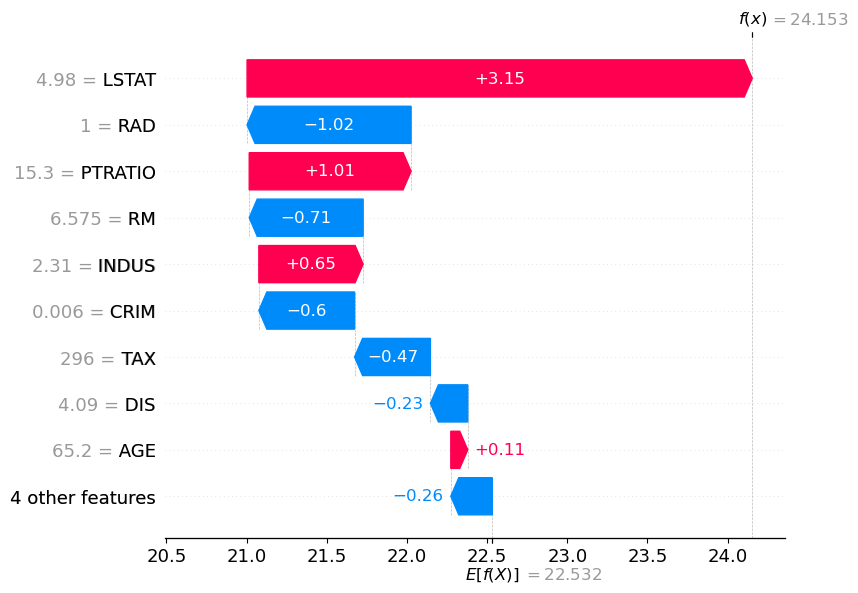

In [27]:
shap.plots.waterfall(shap_values[0])

In [32]:
shap.plots.force(shap_values[0:10])